In [ ]:
import tensorflow as tf

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import numpy as np

### creating data for the model

In [ ]:
X =tf.range(0,100,2)

In [ ]:
y= X +10

In [ ]:
len(y)

50

In [ ]:
train_data = X[:40]
train_lables = y[:40]
test_data = X[40:]
test_lables = y[40:]

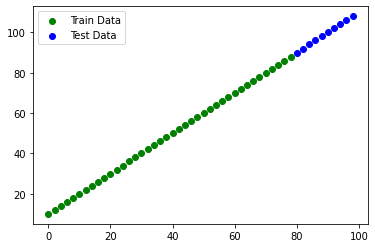

In [ ]:
# visualise
fig , ax = plt.subplots()
plt.scatter(train_data,train_lables, c="green", label= "Train Data")
plt.scatter(test_data,test_lables, c="blue" , label= "Test Data")
plt.legend()


### Regression Model

In [ ]:
#1- creating the model 
model = tf.keras.Sequential(
    tf.keras.layers.Dense(1)
)

#2- compile the model
model.compile(
    loss=tf.keras.losses.mae,
    optimizer= tf.keras.optimizers.Adam(lr=0.1),
    metrics= "MAE"
)
#3- fit the data
model.fit(tf.expand_dims(train_data, axis=-1), train_lables, epochs= 100)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/100
2/2 [==============================] - 1s 18ms/step - loss: 6.3205 - MAE: 6.3205
Epoch 2/100
2/2 [==============================] - 0s 5ms/step - loss: 4.5034 - MAE: 4.5034
Epoch 3/100
2/2 [==============================] - 0s 14ms/step - loss: 4.3170 - MAE: 4.3170
Epoch 4/100
2/2 [==============================] - 0s 6ms/step - loss: 4.1535 - MAE: 4.1535
Epoch 5/100
2/2 [==============================] - 0s 11ms/step - loss: 3.9934 - MAE: 3.9934
Epoch 6/100
2/2 [==============================] - 0s 4ms/step - loss: 4.0397 - MAE: 4.0397
Epoch 7/100
2/2 [==============================] - 0s 8ms/step - loss: 4.0366 - MAE: 4.0366
Epoch 8/100
2/2 [==============================] - 0s 9ms/step - loss: 3.7415 - MAE: 3.7415
Epoch 9/100
2/2 [==============================] - 0s 12ms/step - loss: 3.7159 - MAE: 3.7159
Epoch 10/100
2/2 [==============================] - 0s 7ms/step - loss: 3.7786 - MAE: 3.7786
Epoch 11/100
2/2 [==============================] - 0s 7ms/step - loss: 3.5

In [ ]:
#1- creating the model 
model2 = tf.keras.Sequential(
    tf.keras.layers.Dense(10)
)
model2.add(
    tf.keras.layers.Dense(1)
)
#2- compile the model
model2.compile(
    loss=tf.keras.losses.MSE,
    optimizer= tf.keras.optimizers.Adam(lr=0.1),
    metrics= "MAE"
)
#3- fit the data
model2.fit(tf.expand_dims(train_data, axis=-1), train_lables, epochs= 100, verbose=0)

In [ ]:
prediction = model.predict(test_data)

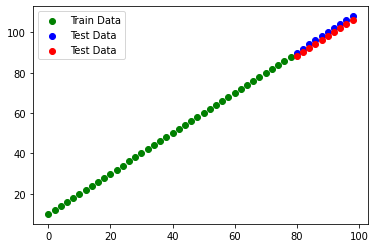

In [ ]:
fig , ax = plt.subplots()
plt.scatter(train_data,train_lables, c="green", label= "Train Data")
plt.scatter(test_data,test_lables, c="blue" , label= "Test Data")
plt.scatter(test_data,prediction, c="red" , label= "Test Data")

plt.legend()

In [ ]:
model.predict([500000.])

array([[490449.12]], dtype=float32)

### evaluating our model with regression evaluation metrics

In [ ]:
model.evaluate(test_data, test_lables)

1/1 [==============================] - 0s 125ms/step - loss: 1.7006 - MAE: 1.7006


[1.700640082359314, 1.700640082359314]

In [ ]:
test_lables.shape, prediction.shape

(TensorShape([10]), (10, 1))

In [ ]:
tf.keras.losses.MAE(test_lables, prediction.squeeze())

<tf.Tensor: shape=(), dtype=float32, numpy=1.7006401>

In [ ]:
tf.expand_dims(test_lables, axis= -1).shape,prediction.shape


(TensorShape([10, 1]), (10, 1))

In [ ]:
tf.keras.losses.MSE(tf.expand_dims(test_lables, axis= -1), prediction)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([2.3364394, 2.4548237, 2.5761337, 2.700344 , 2.8275046, 2.9575906,
       3.0905755, 3.226512 , 3.3653738, 3.507133 ], dtype=float32)>

In [ ]:
# creating a function to visualision 
def visualise(train__data,train_lables, test_data,test_lables , prediction):
  '''visualise your model predictions'''
  fig , ax = plt.subplots()
  plt.scatter(train_data,train_lables, c="green", label= "Train Data")
  plt.scatter(test_data,test_lables, c="blue" , label= "Test Data")
  plt.scatter(test_data,prediction, c="red" , label= "model1 Data")
  plt.scatter(test_data,prediction2, c="yellow" , label= "model2 Data")
  plt.scatter(test_data,prediction3, c="black" , label= "model3 Data")

  plt.legend()

In [ ]:
prediction2 = model2.predict(test_data)

In [ ]:
prediction2.shape, prediction.shape,test_data.shape

((10, 1), (10, 1), TensorShape([10]))

In [ ]:
prediction2

array([[ 90.62158 ],
       [ 92.670815],
       [ 94.72004 ],
       [ 96.76926 ],
       [ 98.81849 ],
       [100.86771 ],
       [102.91694 ],
       [104.96616 ],
       [107.01539 ],
       [109.064606]], dtype=float32)

In [ ]:
visualise(train_data, train_lables,test_data,test_lables, prediction, prediction2) 

TypeError: ignored

In [ ]:
#1- creating the model 
model3 = tf.keras.Sequential(
   [ tf.keras.layers.Dense(10),
        tf.keras.layers.Dense(1)
    ]
)

#2- compile the model
model3.compile(
    loss=tf.keras.losses.MSE,
    optimizer= tf.keras.optimizers.Adam(lr=0.1),
    metrics= "MAE"
)
#3- fit the data
model3.fit(tf.expand_dims(train_data, axis=-1), train_lables, epochs= 500, verbose=0)

In [ ]:
visualise(train_data, train_lables,test_data,test_lables, prediction, prediction2 , model3.predict(test_data)) 

In [ ]:
model3.predict([50])

In [ ]:
pre3 =pre3.squeeze()

In [ ]:
tf.metrics.mean_absolute_error(test_lables, pre3),tf.metrics.mean_squared_error(test_lables, pre3)



## An Example With A Larger Data Set

In [ ]:
# importing the libraries we need
import tensorflow as tf
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
#reading our data
df = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
df.info(), df.head(20), df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


(None,     age     sex     bmi  children smoker     region      charges
 0    19  female  27.900         0    yes  southwest  16884.92400
 1    18    male  33.770         1     no  southeast   1725.55230
 2    28    male  33.000         3     no  southeast   4449.46200
 3    33    male  22.705         0     no  northwest  21984.47061
 4    32    male  28.880         0     no  northwest   3866.85520
 5    31  female  25.740         0     no  southeast   3756.62160
 6    46  female  33.440         1     no  southeast   8240.58960
 7    37  female  27.740         3     no  northwest   7281.50560
 8    37    male  29.830         2     no  northeast   6406.41070
 9    60  female  25.840         0     no  northwest  28923.13692
 10   25    male  26.220         0     no  northeast   2721.32080
 11   62  female  26.290         0    yes  southeast  27808.72510
 12   23    male  34.400         0     no  southwest   1826.84300
 13   56  female  39.820         0     no  southeast  11090.71780
 14 

In [ ]:
#dealing with categories
insurance_one_hot = pd.get_dummies(df)

In [ ]:
#creating features and labels
labels = insurance_one_hot["charges"]
features = insurance_one_hot.drop("charges",axis=1)
len(features.columns)

11

In [ ]:
len(features),len(labels)*0.8,1338- (len(labels)*0.8)

(1338, 1070.4, 267.5999999999999)

In [ ]:
#creating train and test spilt (my spilt)
train_features = features.loc[:1070,]
train_lables = labels[1070]
test_feature = features.loc[1070:]
test_lables = labels[1070:]

In [ ]:
# creating train and test spilt with sklean
from sklearn.model_selection import train_test_split

In [ ]:
train_x, test_x, train_y  , test_y = train_test_split(features, labels, random_state=42, test_size=0.2)
len(train_x), len(train_y), len(test_y)

(1070, 1070, 268)

In [ ]:
from tensorflow.python import metrics
#creating our model 
#seting a random seed
tf.random.set_seed(42)
#1-create the model
insurance_model = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(10),
     tf.keras.layers.Dense(1)
     
    ]
)
#2- compling the model
insurance_model.compile(
    loss = tf.keras.losses.MAE,
    optimizer = tf.keras.optimizers.SGD(),
    metrics= ["mae"]
)

#3- fitting the data to the model
insurance_model.fit(train_x,train_y, epochs = 100)


Epoch 1/100
34/34 [==============================] - 0s 1ms/step - loss: 8637.1006 - mae: 8637.1006
Epoch 2/100
34/34 [==============================] - 0s 1ms/step - loss: 7886.7759 - mae: 7886.7759
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 7558.1470 - mae: 7558.1470
Epoch 4/100
34/34 [==============================] - 0s 1ms/step - loss: 7792.0225 - mae: 7792.0225
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 7748.3887 - mae: 7748.3887
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 7595.3940 - mae: 7595.3940
Epoch 7/100
34/34 [==============================] - 0s 4ms/step - loss: 7589.9844 - mae: 7589.9844
Epoch 8/100
34/34 [==============================] - 0s 6ms/step - loss: 7698.5576 - mae: 7698.5576
Epoch 9/100
34/34 [==============================] - 0s 3ms/step - loss: 7496.7778 - mae: 7496.7778
Epoch 10/100
34/34 [==============================] - 0s 3ms/step - loss: 7493.1743 - mae: 7493.1743

In [ ]:
# make prediction in test data
pre = insurance_model.predict(test_x)
pre.shape , test_x.shape

((268, 1), (268, 11))

In [ ]:
insurance_model.evaluate(test_x,test_y )

9/9 [==============================] - 0s 2ms/step - loss: 7023.3291 - mae: 7023.3291


[7023.3291015625, 7023.3291015625]

## More Expirmenrts
### 1- with more layers
### 2- train for longer
### 3- lr =1

### my second model

In [ ]:
#creating our model 
#seting a random seed
tf.random.set_seed(42)
#1-create the model
insurance_model_2 = tf.keras.Sequential(
    [tf.keras.layers.Dense(100),
        tf.keras.layers.Dense(10),
     tf.keras.layers.Dense(1)
     
    ]
)
#2- compling the model
insurance_model_2.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.Adam(),
    metrics= ["mae"]
)

#3- fitting the data to the model
history = insurance_model_2.fit(train_x,train_y, epochs = 200)


Epoch 1/200
34/34 [==============================] - 1s 4ms/step - loss: 13273.1602 - mae: 13273.1602
Epoch 2/200
34/34 [==============================] - 0s 4ms/step - loss: 13104.4297 - mae: 13104.4297
Epoch 3/200
34/34 [==============================] - 0s 5ms/step - loss: 12749.5420 - mae: 12749.5420
Epoch 4/200
34/34 [==============================] - 0s 4ms/step - loss: 12055.7500 - mae: 12055.7500
Epoch 5/200
34/34 [==============================] - 0s 3ms/step - loss: 10905.8154 - mae: 10905.8154
Epoch 6/200
34/34 [==============================] - 0s 4ms/step - loss: 9457.7217 - mae: 9457.7217
Epoch 7/200
34/34 [==============================] - 0s 5ms/step - loss: 8147.6543 - mae: 8147.6543
Epoch 8/200
34/34 [==============================] - 0s 5ms/step - loss: 7528.8413 - mae: 7528.8413
Epoch 9/200
34/34 [==============================] - 0s 6ms/step - loss: 7429.1528 - mae: 7429.1528
Epoch 10/200
34/34 [==============================] - 0s 6ms/step - loss: 7409.0811 - mae:

In [ ]:
insurance_model_2.evaluate(test_x, test_y)

9/9 [==============================] - 0s 2ms/step - loss: 3491.2961 - mae: 3491.2961


[3491.296142578125, 3491.296142578125]

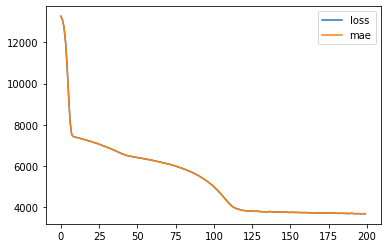

In [ ]:
pd.DataFrame(history.history).plot()

# Working on insurance dataset with a bettet preprocessing

In [ ]:
# importing the libraries we need
import tensorflow as tf
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
#reading our data
df = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
df.info(), df.head(20), df.describe()

In [ ]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [ ]:
#importing sklearn methods
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split


#make a colunm transformer

ct= make_column_transformer(
    (MinMaxScaler(), ['age',  'bmi', 'children']), # making the features range between 0,1
    (OneHotEncoder(), ['sex', 'smoker', 'region']) # recoding categories to 0,1
)

In [ ]:
# make featurs and labels
x = df.drop("charges", axis=1)
y = df["charges"]

In [ ]:
# make train test spilt
x_train, x_test, y_train , y_test = train_test_split(x,y,random_state=42, test_size=0.2)

In [ ]:
 #fit the transformer
 ct.fit(x_train)

ColumnTransformer(transformers=[('minmaxscaler', MinMaxScaler(),
                                 ['age', 'bmi', 'children']),
                                ('onehotencoder', OneHotEncoder(),
                                 ['sex', 'smoker', 'region'])])

In [ ]:
trans_x_train = ct.transform(x_train)

In [ ]:
trans_x_test = ct.transform(x_test)

In [ ]:
#try a new model
#seting a random seed
tf.random.set_seed(42)
#1-create the model
trans_model = tf.keras.Sequential(
    [tf.keras.layers.Dense(100),
        tf.keras.layers.Dense(10),
     tf.keras.layers.Dense(1)
     
    ]
)
#2- compling the model
trans_model.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.Adam(),
    metrics= ["mae"]
)

#3- fitting the data to the model
history = trans_model.fit(trans_x_train,y_train, epochs = 100)

Epoch 1/100
34/34 [==============================] - 1s 6ms/step - loss: 13342.6494 - mae: 13342.6494
Epoch 2/100
34/34 [==============================] - 0s 5ms/step - loss: 13333.4785 - mae: 13333.4785
Epoch 3/100
34/34 [==============================] - 0s 4ms/step - loss: 13312.0234 - mae: 13312.0234
Epoch 4/100
34/34 [==============================] - 0s 4ms/step - loss: 13267.7930 - mae: 13267.7930
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 13189.5830 - mae: 13189.5830
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 13066.4502 - mae: 13066.4502
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 12888.1953 - mae: 12888.1953
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 12644.6523 - mae: 12644.6523
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 12325.5469 - mae: 12325.5469
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 11925.96

In [ ]:
trans_model.evaluate(trans_x_test,y_test)

9/9 [==============================] - 0s 3ms/step - loss: 3438.7844 - mae: 3438.7844


[3438.784423828125, 3438.784423828125]